In [1]:
#pip install demoji
#pip install emoji

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import nltk
import emoji

In [3]:
salarydf =  pd.read_excel("/home/shaury/Downloads/Comments - FilterCopy Videos.xlsx",sheet_name="If Salary Were A Person")
salarydf.head()

,Name,Comment,Time,Likes,Reply Count
0,FilterCopy,What do you spend your salary on? Comment belo...,2018-07-06T06:23:53Z,2951.0,192.0
1,AAYAN KUMAR,i was looking at veer at the beer cafe and he ...,2021-09-16T07:29:31Z,0.0,0.0
2,Abhi Borthakur,"And here people like us, whose salary come wit...",2021-09-16T02:57:02Z,0.0,0.0
3,Soham Waikar,The husband is nothing but salary in men,2021-09-15T08:18:18Z,0.0,0.0
4,Yuvraj Barve,this was the first video of Filtercopy i had s...,2021-09-15T06:57:05Z,0.0,0.0


In [4]:
everydf = pd.read_excel("/home/shaury/Downloads/Comments - FilterCopy Videos.xlsx",sheet_name="Every Exam Preparation Ever")
everydf.head()

,Name,Comment,Time,Likes,Reply Count
0,M Square,What a starting🤣🤣🤣,2021-09-16T11:19:50Z,0.0,0.0
1,Kushi Jakhotia,All the best for your exam aachese padhna exam...,2021-09-16T11:19:11Z,0.0,0.0
2,p i n k p e a c e e,Idk why exam ki prep mein bhi alag h feel aati...,2021-09-16T10:13:06Z,0.0,0.0
3,Anurag Bhattarai,I am watching this just hours before my exam,2021-09-16T08:34:14Z,0.0,0.0
4,Keya Das,"Everybody... 😂 holi pe nasha karke, rabbi ne c...",2021-09-16T08:13:41Z,0.0,0.0


(<AxesSubplot:>, <AxesSubplot:>)

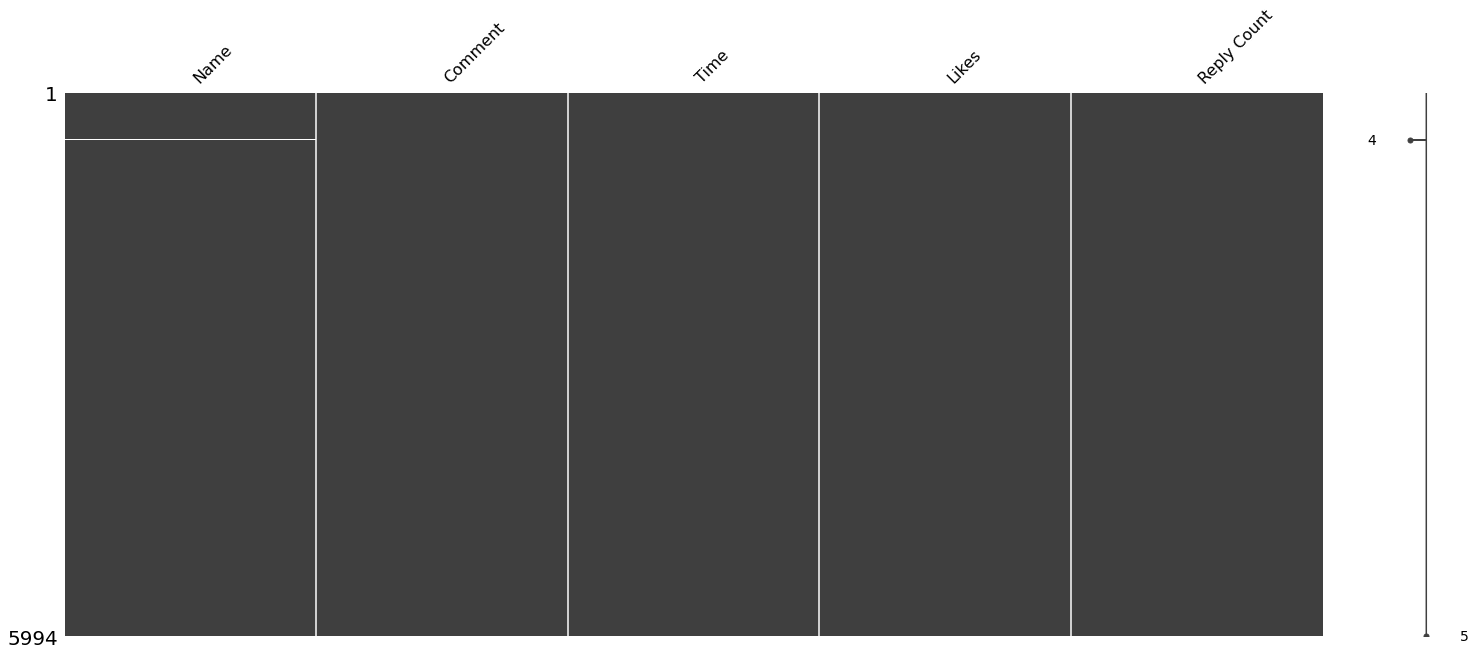

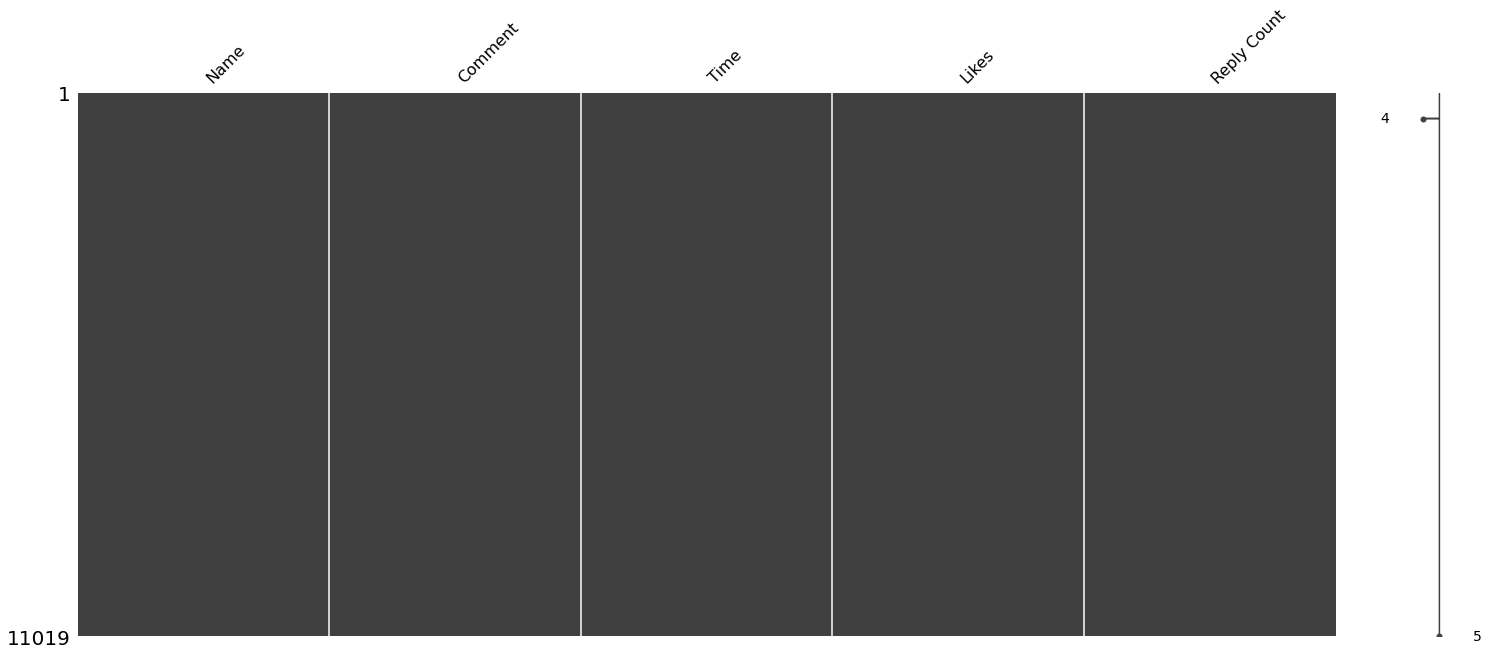

In [5]:
import missingno as ms
ms.matrix(everydf),ms.matrix(salarydf)

In [6]:
everydf.isna().sum(),salarydf.isna().sum()

(Name           1
 Comment        0
 Time           0
 Likes          0
 Reply Count    0
 dtype: int64,
 Name           1
 Comment        0
 Time           0
 Likes          0
 Reply Count    0
 dtype: int64)

In [7]:
everydf['Name'].nunique(),salarydf['Name'].nunique()

(5636, 10502)

# preprocessing 

## adding emojis as text for better understanding of the comment

In [8]:
def clean(x):
    if(type(x)!=str):
        return 'None'
    y= ""
    spec = [",",".","/","\\","?","!","@","#","$","%","*",":",";","{","}","(",")"]
    for i in x:
        if((i.isalnum()) or (i==' ')):
            if(i not in spec):
                y = y+i
    return emoji.demojize(x, delimiters=(", ", ",")).replace("_"," ") # converting emojis to text 

In [9]:
everydf['comment'] = everydf['Comment'].map(clean)
salarydf['comment'] = salarydf['Comment'].map(clean)

In [10]:
from nltk.corpus import stopwords

In [11]:
stopwords = stopwords.words("english")

In [12]:
def rem(x):
    return " ".join([w for w in x.lower().split() if w not in stopwords])        

In [13]:
everydf['comment'] = everydf['comment'].map(rem)
salarydf['comment'] = salarydf['comment'].map(rem)

## sentiment analysis

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [15]:
sent_model = SentimentIntensityAnalyzer()

### adding some commonly used hindi words to the lexicon

In [16]:
hindi_words = {
                "acha": 3.0,
                "bahut acha": 3.0,
                "badhiya": 3.0,
                "mast": 3.0,
                "gazab": 3.0,
                "behtareen": 3.0,
                "mazedar": 3.0,
                "jhakkas": 3.5,
                "sundar": 3.5,
                "khoobsurat": 3,
                "bawaal": 3.5,
                "ek no.":3,
                "ek number": 3,
                "sahi": 2,
                "lajawaab":2,
                "lajawab":2,
                "rapchik":2,
                
                
                "bura": -2,
                "bekar": -2,
                "bekaar": -1,
                "ghatiya": -1.5,
                "ganda": -1.5,
                "kharaab": -2,
                "kharab":    -2
                }

In [17]:
sent_model.lexicon.update(hindi_words)

In [18]:
def sentiments_with_hindi(x):
    if(sent_model.polarity_scores(x)['pos']>sent_model.polarity_scores(x)['neg']):
        return "Positive"
    elif(sent_model.polarity_scores(x)['pos']<sent_model.polarity_scores(x)['neg']):
        return "Negative"
    else:
        return "Neutral"

In [19]:
everydf['nature_of_comment'] = everydf['comment'].map(sentiments_with_hindi)
salarydf['nature_of_comment'] = salarydf['comment'].map(sentiments_with_hindi)

## percentage of sentiments in comments 

In [20]:
every = pd.DataFrame(100 * everydf['nature_of_comment'].value_counts()/len(everydf)).reset_index()
every.columns = ['nature of comment','% for everydf']
salary = pd.DataFrame(100 * salarydf['nature_of_comment'].value_counts()/len(salarydf)).reset_index()
salary.columns = ['nature of comment','% for salarydf']
every,salary

(  nature of comment  % for everydf
 0          Positive      44.494494
 1           Neutral      36.436436
 2          Negative      19.069069,
   nature of comment  % for salarydf
 0          Positive       64.325256
 1           Neutral       26.109447
 2          Negative        9.565296)

In [21]:
final = pd.concat([every,salary.drop('nature of comment',axis=1)],axis=1).set_index("nature of comment")

Text(0.5, 1.0, 'If Salary Were A Person')

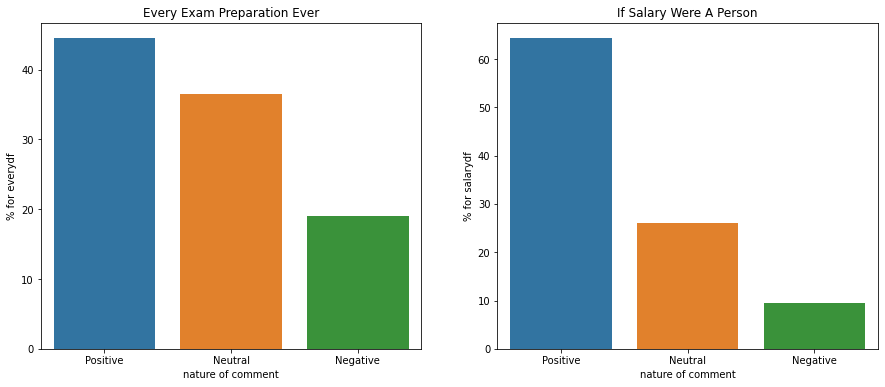

In [23]:
fig,axes= plt.subplots(ncols=2,figsize=(15,6)) 
sns.barplot(ax=axes[0],x=every['nature of comment'],y=every['% for everydf']).set_title("Every Exam Preparation Ever")
sns.barplot(ax=axes[1],x=salary['nature of comment'],y=salary['% for salarydf']).set_title("If Salary Were A Person")

## final plot for comparision

<AxesSubplot:xlabel='nature of comment'>

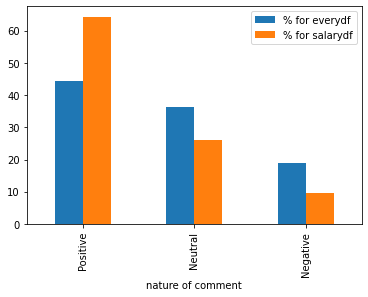

In [24]:
final.plot(kind='bar')

## hence The video titled - If Salary were a person got much better response from people than the other video.